In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot
import plotly_express as px 
import re 
from textblob import TextBlob 
from wordcloud import WordCloud
import random
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network,multiclass
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression,LinearRegression,RidgeClassifier,RidgeClassifierCV,PassiveAggressiveClassifier,LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC,OneClassSVM
from sklearn.multiclass import OutputCodeClassifier,OneVsOneClassifier,OneVsRestClassifier
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network,multiclass
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve,f1_score,roc_auc_score
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aai\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
dataset = pd.read_csv("IMDB_Dataset.csv")
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
dataset.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
dataset['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

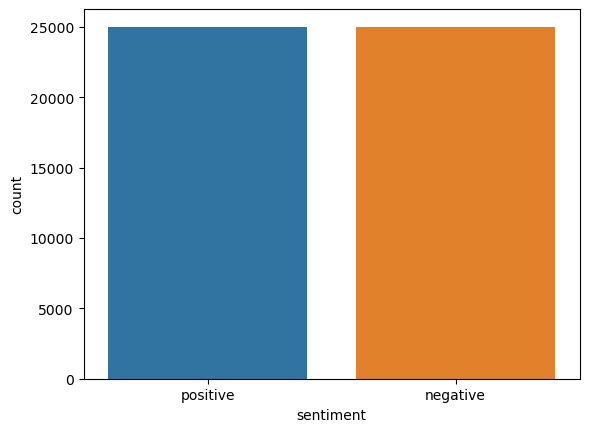

In [7]:
sns.countplot(x=dataset["sentiment"])

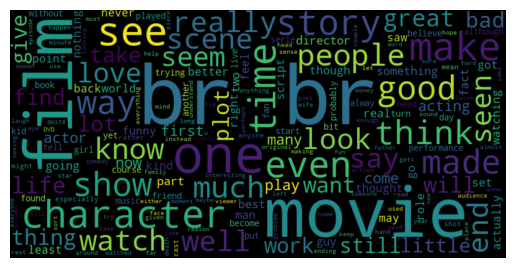

In [8]:
totalwords = " ".join( [reve for reve in dataset['review']])
wordcloud = WordCloud(width=800,height=400,random_state=50,max_font_size=130).generate(totalwords)


plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [9]:
mapping = {'positive':1 , 'negative':0}
dataset['sentiment'].replace(mapping,inplace=True)

In [10]:
trainingdata = dataset.loc[:40000]
testingdata = dataset.loc[40000:50000]

In [11]:
trainingdata.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [12]:
testingdata.head()

,review,sentiment
40000,First off I want to say that I lean liberal on...,0
40001,I was excited to see a sitcom that would hopef...,0
40002,When you look at the cover and read stuff abou...,0
40003,"Like many others, I counted on the appearance ...",0
40004,"This movie was on t.v the other day, and I did...",0


In [13]:
print(trainingdata.shape)
print(testingdata.shape)

(40001, 2)
(10000, 2)


In [14]:
#Clearing the Data

# 1. Clearing HTML scripts
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# 2. Removing the square brackets
def remove_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# 3. Removing special character 
def sp_char(text):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Removing 
def final(text):
    text = strip_html(text)
    text = remove_brackets(text)
    text  = sp_char(text)
    return text
#Apply function on review column on Training & Testing.
trainingdata['review'] = trainingdata['review'].apply(final)
testingdata['review'] = testingdata['review'].apply(final)

In [15]:
def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    text= ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text


trainingdata['review'] = trainingdata['review'].apply(lemmatize)
testingdata['review'] = testingdata['review'].apply(lemmatize)

In [16]:
# Converting the capital letters into lower.
trainingdata['review'] = trainingdata['review'].str.lower()
testingdata['review'] = testingdata['review'].str.lower()

In [17]:
# Creating Stopwords Lists.
stopwords = set(stopwords.words("english"))
print(stopwords)

{'needn', 'down', 'can', "shan't", "wasn't", 'wasn', 'at', 'mustn', 'over', 'all', 'an', 'any', 'a', 'who', 'himself', 'into', 'weren', 'the', 'how', 'up', "should've", 'whom', 'before', "wouldn't", 'd', 'haven', 'again', 'my', 'some', 'below', 'of', 'shan', 'wouldn', 'our', "you'd", 't', 'once', 'just', 'he', 'while', 'from', "couldn't", 'both', 'won', 'o', 'me', 'its', 'she', 'them', 'or', 'what', 'because', "haven't", 'it', 'so', 'their', 'ourselves', "isn't", "mightn't", 'does', 'shouldn', 'more', "shouldn't", 'itself', 'each', 'doing', 'out', "you'll", 'but', 'not', 'has', "won't", "doesn't", 'don', 'themselves', 'his', 'that', 'after', 'such', 'll', 'by', 'am', 'which', 'too', 'against', 'this', 'than', "it's", 'here', 're', 'other', 'hadn', 'him', 'did', 'until', 'should', 'with', 'we', 'off', 'to', 'and', 'further', 'then', 'as', 'when', "aren't", 'was', 'ma', 'on', 'they', 'these', 'why', 'yours', 'yourselves', "you've", 'in', 'are', 'have', 'own', 'didn', 's', 'theirs', 'abov

In [18]:
# Stopwords for both Training & Testing.
trainingdata['review']=[word for word in trainingdata['review'] if not word in stopwords]
testingdata['review']=[word for word in testingdata['review'] if not word in stopwords]

In [19]:
trainingdata['review'][0]

'one of the other reviewer ha mentioned that after watching just 1 oz episode youll be hooked they are right a this is exactly what happened with methe first thing that struck me about oz wa it brutality and unflinching scene of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pull no punch with regard to drug sex or violence its is hardcore in the classic use of the wordit is called oz a that is the nickname given to the oswald maximum security state penitentary it focus mainly on emerald city an experimental section of the prison where all the cell have glass front and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangsta latinos christians italians irish and moreso scuffle death stare dodgy dealing and shady agreement are never far awayi would say the main appeal of the show is due to the fact that it go where other show wouldnt dare forget pretty picture painted for mainstream

In [20]:
testingdata['review'][41000]

'this film is the worst film i have ever seen the story line is weak i couldnt even follow it the acting is highschoolish the sound track is irritating the attempt at humor are not the editing is horrible the credit are even slow i would be embarrassed to have my name associated with this waste of film dont waste your time even thinking about this attempt at acting'

In [21]:
#  Splitting the Datasets.

y = trainingdata['sentiment']
x = trainingdata.drop('sentiment',axis = 1)


In [22]:
x.head()

,review
0,one of the other reviewer ha mentioned that af...
1,a wonderful little production the filming tech...
2,i thought this wa a wonderful way to spend tim...
3,basically there a family where a little boy ja...
4,petter matteis love in the time of money is a ...


In [23]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: sentiment, dtype: int64

In [24]:
x_traindata,x_testdata,y_traindata,y_testdata = train_test_split(x,y,test_size=0.3)

In [25]:
x_traindata

,review
23567,that this film ha such a low imdb rating is no...
33343,i watched this movie after seeing other commen...
29907,despite an overall pleasing plot and expensive...
28192,i saw this film back at the 2005 palm springs ...
11208,this quirky and watchable film is the story of...
...,...
38598,a lot of the problem many people have with thi...
25426,i wa treated to a viewing of cracker bag last ...
31903,im a massive fan of prison drama which is refl...
37782,i wa cast a the surfer dude in the beach scene...


In [26]:
y_testdata

23103    1
30688    0
12214    1
32997    0
23607    0
        ..
34163    0
1718     1
467      1
19360    1
33887    1
Name: sentiment, Length: 12001, dtype: int64

In [27]:
print("x_traindata :",x_traindata.shape)
print("x_test :",x_testdata.shape)
print(x_traindata['review'])

x_traindata : (28000, 1)
x_test : (12001, 1)
23567    that this film ha such a low imdb rating is no...
33343    i watched this movie after seeing other commen...
29907    despite an overall pleasing plot and expensive...
28192    i saw this film back at the 2005 palm springs ...
11208    this quirky and watchable film is the story of...
                               ...                        
38598    a lot of the problem many people have with thi...
25426    i wa treated to a viewing of cracker bag last ...
31903    im a massive fan of prison drama which is refl...
37782    i wa cast a the surfer dude in the beach scene...
27918    it wasnt the most pointless animation film exp...
Name: review, Length: 28000, dtype: object


In [28]:
#Vectorizing data

tfidf_vect = TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3)) #tfidfVectorizer
Xtrain = tfidf_vect.fit_transform(x_traindata['review'])
Xtest = tfidf_vect.transform(x_testdata['review'])
print("Xtrain :",Xtrain.shape)
print("Xtest :",Xtest.shape)

Xtrain : (28000, 4793578)
Xtest : (12001, 4793578)


#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
Cxtraindata=cv.fit_transform(x_traindata['review'])
#transformed test reviews
Cxtestdata=cv.transform(x_testdata['review'])

print('Cxtraindata:',Cxtraindata.shape)
print('Cxtestdata:',Cxtestdata.shape)

In [29]:
def print_evaluate(true, predicted):  
    acc = metrics.accuracy_score(true, predicted)
    precision = metrics.precision_score(true, predicted)
    recall   = metrics.recall_score(true, predicted)
    f1 = metrics.f1_score(true, predicted)
    print('Accuracy:', acc)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score', f1)
    print('__________________________________')

In [30]:
KNN = KNeighborsClassifier()
KNN.fit(Xtrain, y_traindata)
train_pred = KNN.predict(Xtrain)
test_pred = KNN.predict(Xtest)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_traindata, train_pred)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_testdata, test_pred)

Train set evaluation:
_____________________________________
Accuracy: 0.5793214285714285
Precision: 0.7503392130257802
Recall: 0.23711855927963982
F1-Score 0.36035840347542764
__________________________________
Test set evaluation:
_____________________________________
Accuracy: 0.4997916840263311
Precision: 0.4992914501653283
Recall: 0.17616666666666667
F1-Score 0.26044104964888504
__________________________________


In [32]:
le = LogisticRegression()
le.fit(Xtrain, y_traindata)
train_pred = le.predict(Xtrain)
test_pred = le.predict(Xtest)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_traindata, train_pred)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_testdata, test_pred)

Train set evaluation:
_____________________________________
Accuracy: 0.9975
Precision: 1.0
Recall: 0.9949974987493747
F1-Score 0.9974924774322969
__________________________________
Test set evaluation:
_____________________________________
Accuracy: 0.7511874010499126
Precision: 0.7623607242339833
Recall: 0.7298333333333333
F1-Score 0.7457425068119891
__________________________________
